In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
rhpass=pd.read_csv("dos.csv", parse_dates=['Time'])
rhpass.head()

,Time,Source,Destination,Protocol,Length,Info
0,2011-11-16 10:37:08,10.10.10.15,10.10.10.25,TCP,62,23888 > 80 [SYN] Seq=0 Win=16384 Len=0 MSS=146...
1,2011-11-16 10:37:08,10.10.10.25,10.10.10.15,TCP,62,"80 > 23888 [SYN, ACK] Seq=0 Ack=1 Win=16384 Le..."
2,2011-11-16 10:37:08,10.10.10.15,10.10.10.25,TCP,60,23888 > 80 [ACK] Seq=1 Ack=1 Win=17520 Len=0
3,2011-11-16 10:37:08,10.10.10.15,10.10.10.25,TCP,62,23890 > 80 [SYN] Seq=0 Win=16384 Len=0 MSS=146...
4,2011-11-16 10:37:08,10.10.10.25,10.10.10.15,TCP,62,"80 > 23890 [SYN, ACK] Seq=0 Ack=1 Win=16384 Le..."


In [4]:
rhpass["Type"] = rhpass.apply(lambda x: "Client" if x["Source"] == rhpass.irow(0)["Source"] else "Server", axis=1)

In [5]:
rhpass.head()

,Time,Source,Destination,Protocol,Length,Info,Type
0,2011-11-16 10:37:08,10.10.10.15,10.10.10.25,TCP,62,23888 > 80 [SYN] Seq=0 Win=16384 Len=0 MSS=146...,Client
1,2011-11-16 10:37:08,10.10.10.25,10.10.10.15,TCP,62,"80 > 23888 [SYN, ACK] Seq=0 Ack=1 Win=16384 Le...",Server
2,2011-11-16 10:37:08,10.10.10.15,10.10.10.25,TCP,60,23888 > 80 [ACK] Seq=1 Ack=1 Win=17520 Len=0,Client
3,2011-11-16 10:37:08,10.10.10.15,10.10.10.25,TCP,62,23890 > 80 [SYN] Seq=0 Win=16384 Len=0 MSS=146...,Client
4,2011-11-16 10:37:08,10.10.10.25,10.10.10.15,TCP,62,"80 > 23890 [SYN, ACK] Seq=0 Ack=1 Win=16384 Le...",Server


In [6]:
infodata2 = rhpass[['Length','Time','Info']]
infodata2.head()

,Length,Time,Info
0,62,2011-11-16 10:37:08,23888 > 80 [SYN] Seq=0 Win=16384 Len=0 MSS=146...
1,62,2011-11-16 10:37:08,"80 > 23888 [SYN, ACK] Seq=0 Ack=1 Win=16384 Le..."
2,60,2011-11-16 10:37:08,23888 > 80 [ACK] Seq=1 Ack=1 Win=17520 Len=0
3,62,2011-11-16 10:37:08,23890 > 80 [SYN] Seq=0 Win=16384 Len=0 MSS=146...
4,62,2011-11-16 10:37:08,"80 > 23890 [SYN, ACK] Seq=0 Ack=1 Win=16384 Le..."


In [7]:
infodata2 = infodata2.set_index('Time')
infodata2.head()

,Length,Info
Time,,
2011-11-16 10:37:08,62,23888 > 80 [SYN] Seq=0 Win=16384 Len=0 MSS=146...
2011-11-16 10:37:08,62,"80 > 23888 [SYN, ACK] Seq=0 Ack=1 Win=16384 Le..."
2011-11-16 10:37:08,60,23888 > 80 [ACK] Seq=1 Ack=1 Win=17520 Len=0
2011-11-16 10:37:08,62,23890 > 80 [SYN] Seq=0 Win=16384 Len=0 MSS=146...
2011-11-16 10:37:08,62,"80 > 23890 [SYN, ACK] Seq=0 Ack=1 Win=16384 Le..."


In [8]:
infodata2.resample('T',how=sum).head()

,Length
Time,
2011-11-16 10:37:00,183640
2011-11-16 10:38:00,220524
2011-11-16 10:39:00,170614
2011-11-16 10:40:00,217962
2011-11-16 10:41:00,490544


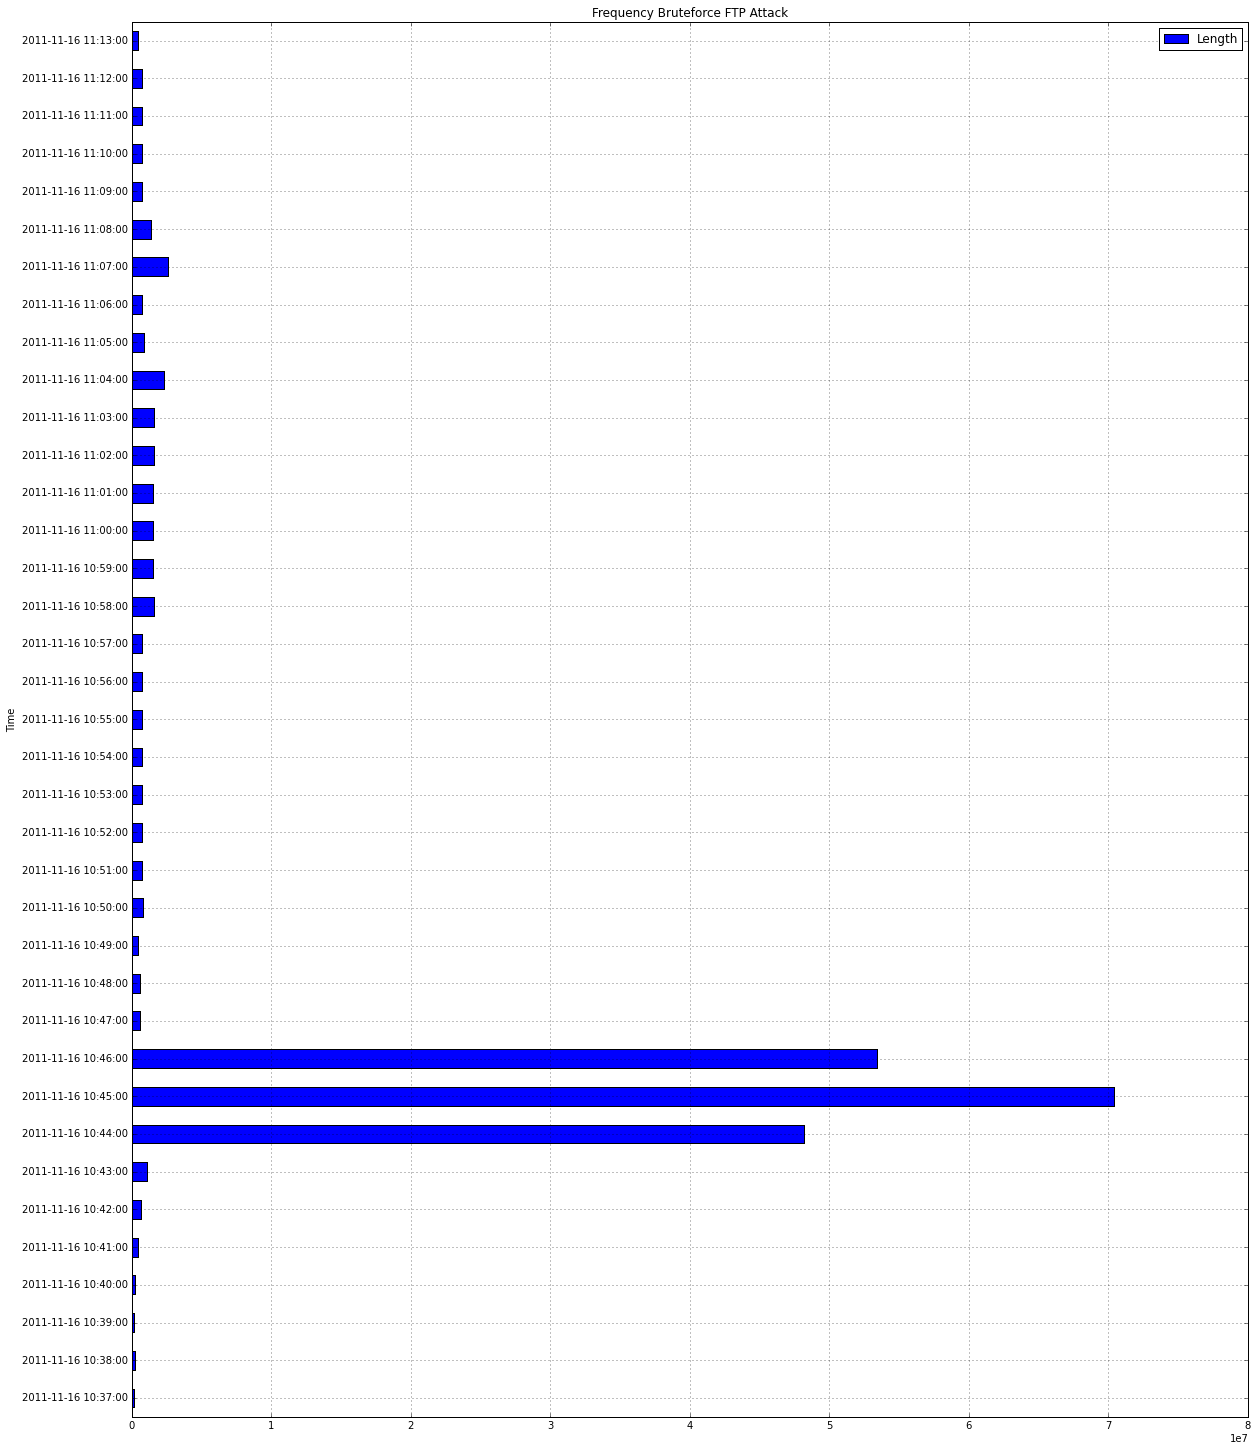

In [9]:
infodata2_plot = infodata2.resample('T',how=sum).plot(kind="barh",title="Frequency DOS Attack",figsize=(20,25),legend=True)

In [10]:
fig = infodata2_plot.get_figure()
fig.savefig("Frekuensi DOS.png")

In [11]:
rhpass.head()

,Time,Source,Destination,Protocol,Length,Info,Type
0,2011-11-16 10:37:08,10.10.10.15,10.10.10.25,TCP,62,23888 > 80 [SYN] Seq=0 Win=16384 Len=0 MSS=146...,Client
1,2011-11-16 10:37:08,10.10.10.25,10.10.10.15,TCP,62,"80 > 23888 [SYN, ACK] Seq=0 Ack=1 Win=16384 Le...",Server
2,2011-11-16 10:37:08,10.10.10.15,10.10.10.25,TCP,60,23888 > 80 [ACK] Seq=1 Ack=1 Win=17520 Len=0,Client
3,2011-11-16 10:37:08,10.10.10.15,10.10.10.25,TCP,62,23890 > 80 [SYN] Seq=0 Win=16384 Len=0 MSS=146...,Client
4,2011-11-16 10:37:08,10.10.10.25,10.10.10.15,TCP,62,"80 > 23890 [SYN, ACK] Seq=0 Ack=1 Win=16384 Le...",Server


In [12]:
category_group=rhpass.groupby(['Source','Destination','Protocol']).sum()
category_group.head()

Length
Source      Destination Protocol        
10.10.10.15 10.10.10.20 ICMP         120
                        UDP           60
            10.10.10.25 802.11       276
                        ADP          120
                        ALC          120

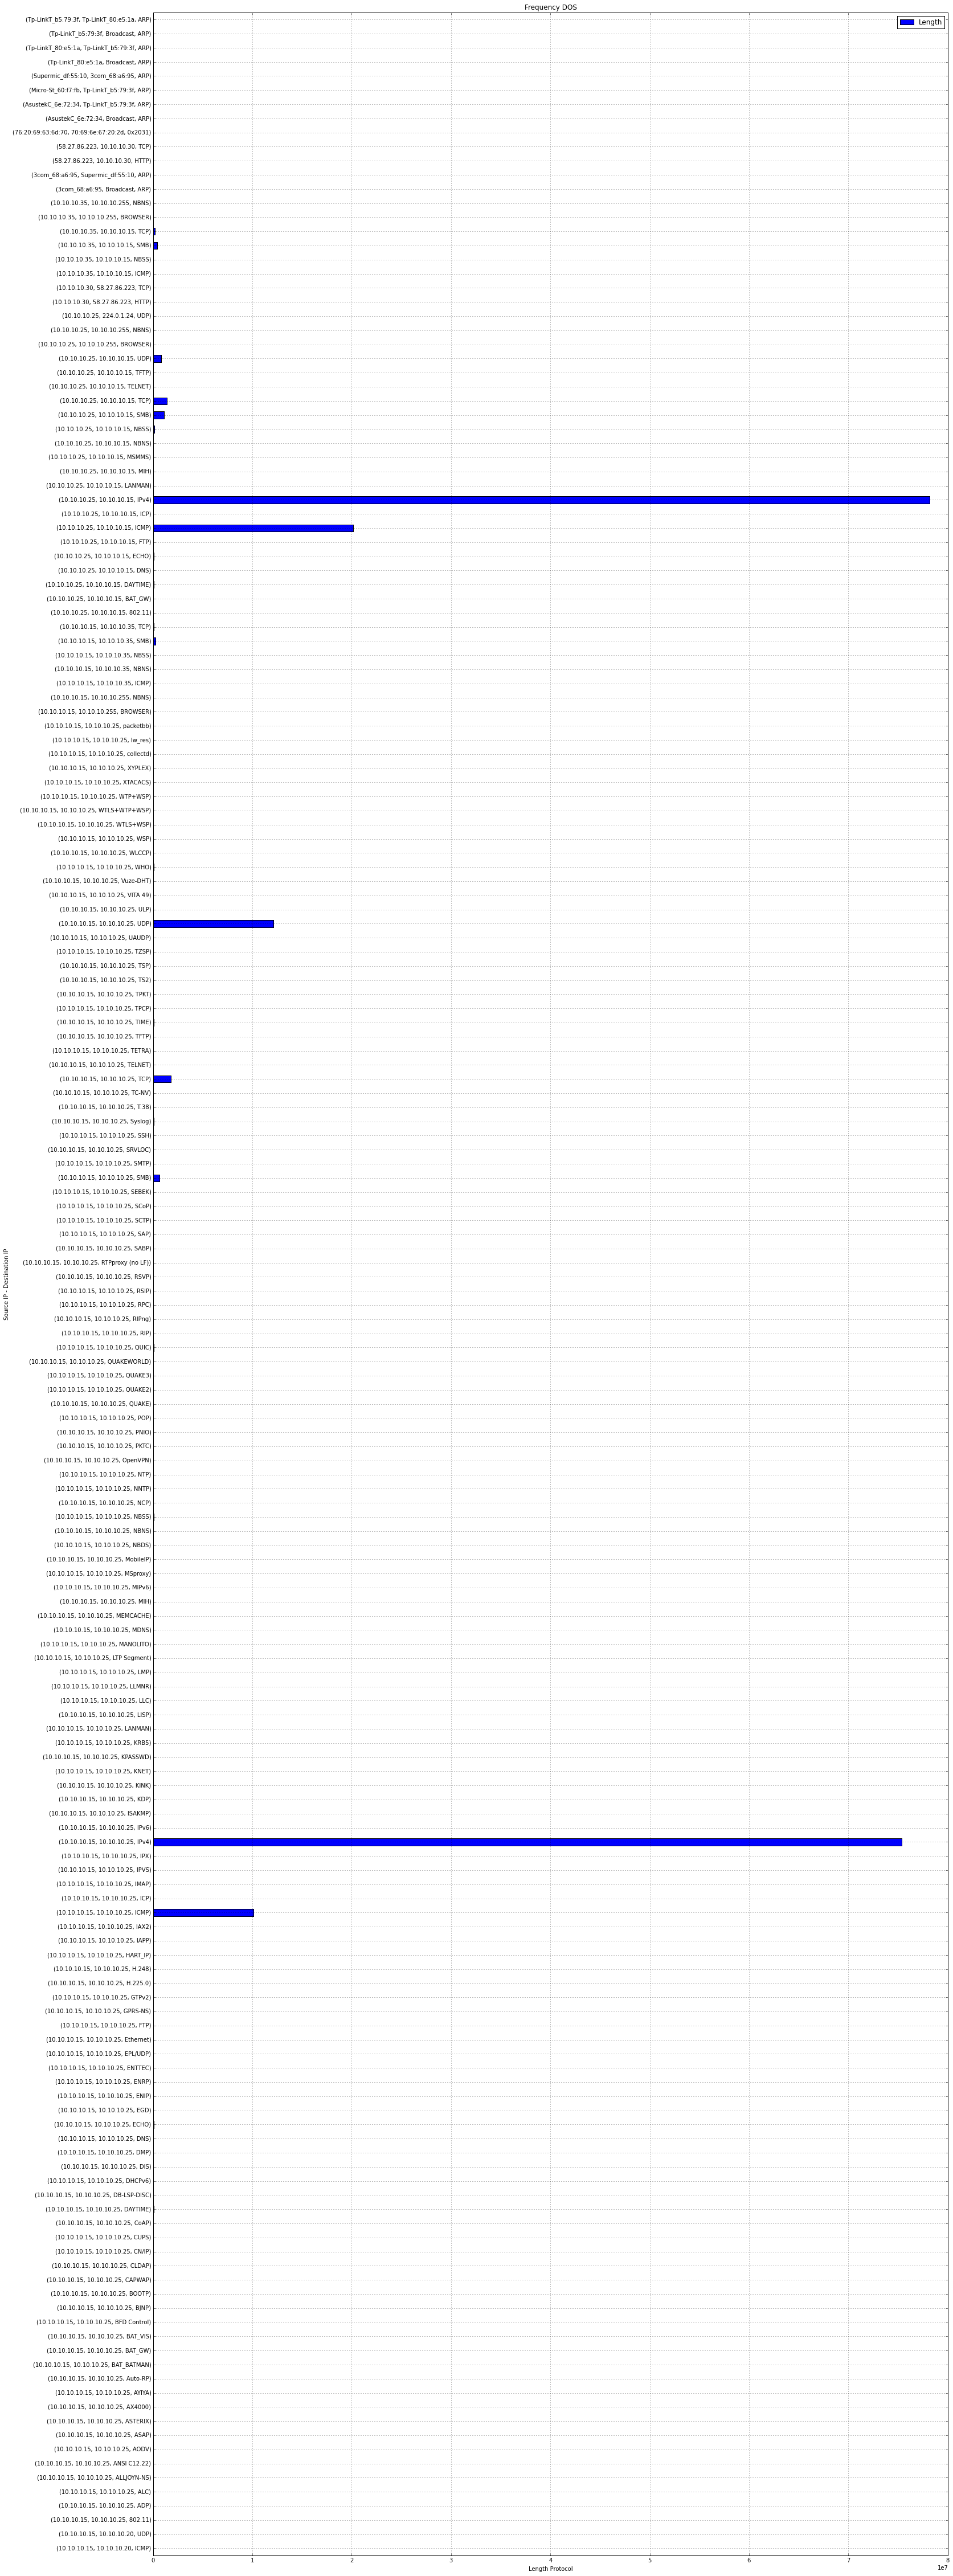

In [13]:
my_plot = category_group.plot(kind='barh',stacked=True,title="Frequency DOS",figsize=(25,80))
my_plot.set_xlabel("Length Protocol")
my_plot.set_ylabel("Source IP - Destination IP")

In [14]:
fig = infodata2_plot.get_figure()
fig.savefig("Frekuensi DOS.png")

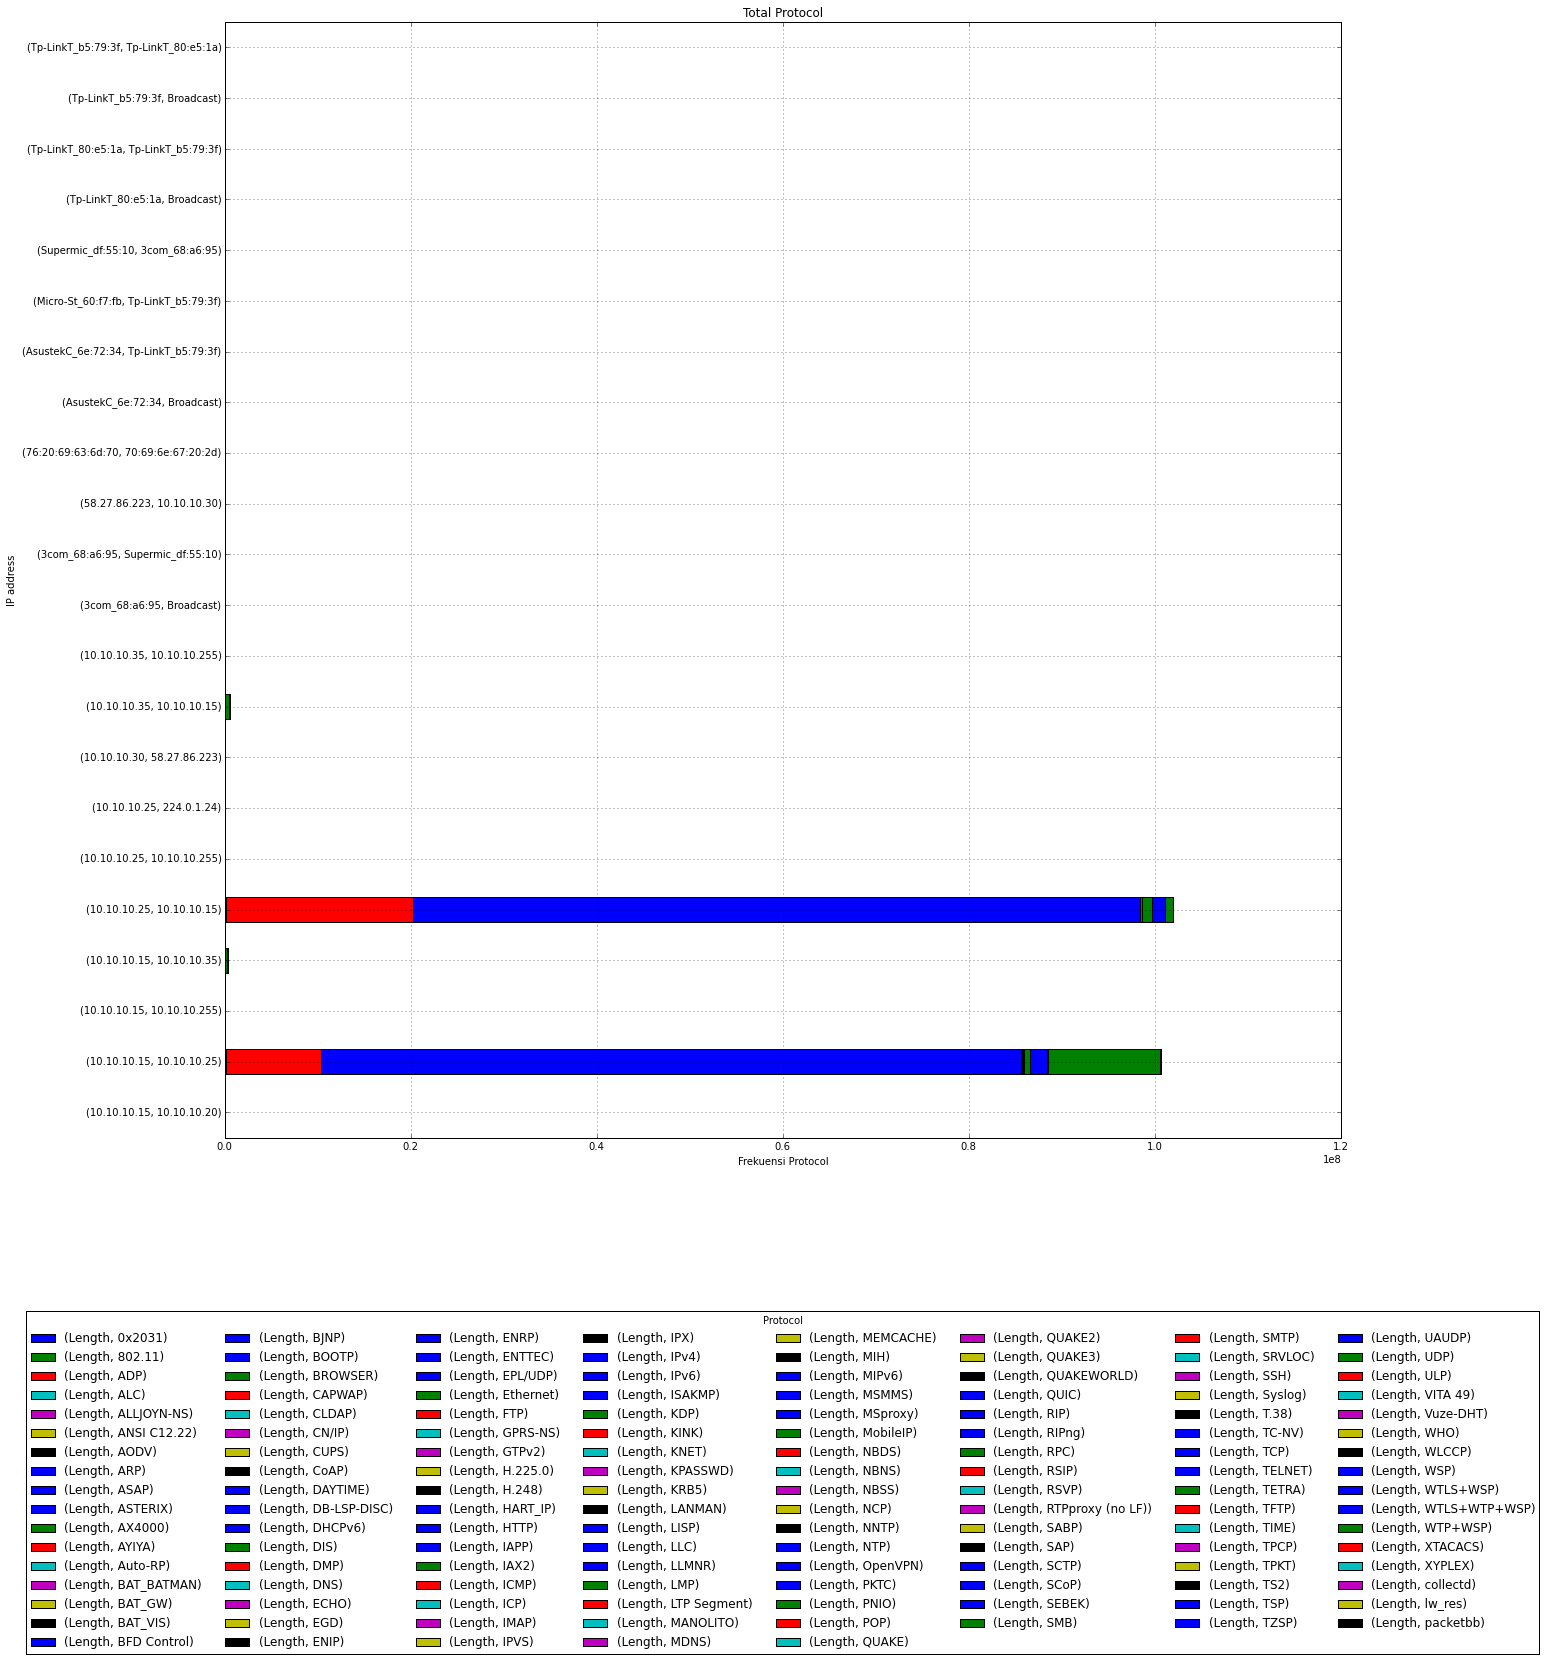

In [15]:
my_plot = category_group.unstack().plot(kind='barh',stacked=True,title="Total Protocol",figsize=(20, 20))
my_plot.set_xlabel("Frekuensi Protocol")
my_plot.set_ylabel("IP address")
patches, labels = my_plot.get_legend_handles_labels()
my_plot.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=8, title="Protocol")